In [27]:
import sklearn
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

from src.models.train_model import CrossValidate


Leaf Classificatio

In [28]:
data_dir_path = '../data/external'
data = pd.read_csv(data_dir_path + "/train.csv")

## Pre-traitement des données
### Separer les classes de features
`y_train` = classes or label
`x_train` = features

In [29]:
data.columns

Index(['id', 'species', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5',
       'margin6', 'margin7', 'margin8',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=194)

In [30]:
data.head(7)

id                species   margin1   margin2   margin3   margin4  \
0   1            Acer_Opalus  0.007812  0.023438  0.023438  0.003906   
1   2  Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625   
2   3   Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812   
3   5        Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859   
4   6     Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766   
5   8   Magnolia_Salicifolia  0.070312  0.093750  0.033203  0.001953   
6  10    Quercus_Canariensis  0.021484  0.031250  0.017578  0.009766   

    margin5   margin6   margin7  margin8  ...  texture55  texture56  \
0  0.011719  0.009766  0.027344      0.0  ...   0.007812   0.000000   
1  0.025391  0.001953  0.019531      0.0  ...   0.000977   0.000000   
2  0.003906  0.005859  0.068359      0.0  ...   0.154300   0.000000   
3  0.021484  0.019531  0.023438      0.0  ...   0.000000   0.000977   
4  0.013672  0.015625  0.005859      0.0  ...   0.096680   0.000000   
5  0.000000  0.152340  0.007812      0.0  ...   0.145510   0.000000   
6  0.001953  0.042969  0.039062      0.0  ...   0.085938   0.000000   

   texture57  texture58  texture59  texture60  texture61  texture62  \
0   0.002930   0.002930   0.035156        0.0        0.0   0.004883   
1   0.000000   0.000977   0.023438        0.0        0.0   0.000977   
2   0.005859   0.000977   0.007812        0.0        0.0   0.000000   
3   0.000000   0.000000   0.020508        0.0        0.0   0.017578   
4   0.021484   0.000000   0.000000        0.0        0.0   0.000000   
5   0.041992   0.000000   0.005859        0.0        0.0   0.000000   
6   0.040039   0.000000   0.009766        0.0        0.0   0.000000   

   texture63  texture64  
0   0.000000   0.025391  
1   0.039062   0.022461  
2   0.020508   0.002930  
3   0.000000   0.047852  
4   0.000000   0.031250  
5   0.001953   0.013672  
6   0.039062   0.003906  

[7 rows x 194 columns]

In [31]:
from src.data.preprocessing_data import LeafDataPreprocessing
processed_data = LeafDataPreprocessing(data=data, normalized=True)


In [32]:
processed_data.describe()

id     margin1     margin2     margin3     margin4  \
count   990.000000  990.000000  990.000000  990.000000  990.000000   
mean    799.595960    0.017412    0.028539    0.031988    0.023280   
std     452.477568    0.019739    0.038855    0.025847    0.028411   
min       1.000000    0.000000    0.000000    0.000000    0.000000   
25%     415.250000    0.001953    0.001953    0.013672    0.005859   
50%     802.500000    0.009766    0.011719    0.025391    0.013672   
75%    1195.500000    0.025391    0.041016    0.044922    0.029297   
max    1584.000000    0.087891    0.205080    0.156250    0.169920   

          margin5     margin6     margin7     margin8     margin9  ...  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  ...   
mean     0.014264    0.038579    0.019202    0.001083    0.007167  ...   
std      0.018390    0.052030    0.017511    0.002743    0.008933  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.001953    0.000000    0.005859    0.000000    0.001953  ...   
50%      0.007812    0.015625    0.015625    0.000000    0.005859  ...   
75%      0.017578    0.056153    0.029297    0.000000    0.007812  ...   
max      0.111330    0.310550    0.091797    0.031250    0.076172  ...   

        texture55   texture56   texture57   texture58   texture59   texture60  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  990.000000   
mean     0.036501    0.005024    0.015944    0.011586    0.016108    0.014017   
std      0.063403    0.019321    0.023214    0.025040    0.015335    0.060151   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000977    0.000000    0.004883    0.000000   
50%      0.004883    0.000000    0.005859    0.000977    0.012695    0.000000   
75%      0.043701    0.000000    0.022217    0.009766    0.021484    0.000000   
max      0.429690    0.202150    0.172850    0.200200    0.106450    0.578130   

        texture61   texture62   texture63   texture64  
count  990.000000  990.000000  990.000000  990.000000  
mean     0.002688    0.020291    0.008989    0.019420  
std      0.011415    0.039040    0.013791    0.022768  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000977  
50%      0.000000    0.003906    0.002930    0.011719  
75%      0.000000    0.023438    0.012695    0.029297  
max      0.151370    0.375980    0.086914    0.141600  

[8 rows x 193 columns]

In [33]:
classes = processed_data.get_classes()

print("Nombre  de classe : ", classes.shape)

Nombre  de classe :  (99,)


#### Encoder les labels en numérique

In [34]:
t_train = processed_data.y_train
t_train

0       3
1      49
2      65
3      94
4      84
       ..
985    40
986     5
987    11
988    78
989    50
Name: species, Length: 990, dtype: int32

### Mise à l'échelle
La mise à l'échelle des données, ou normalisation, est une étape cruciale en prétraitement des données. le but :


1. **Uniformité**: Elle assure que toutes les caractéristiques numériques contribuent également à l'analyse sans être biaisées par leur échelle d'origine.

2. **Meilleure convergence**: Beaucoup d'algorithmes de machine learning, comme les réseaux de neurones et les méthodes de descente de gradient, convergent plus rapidement lorsque les données sont mises à l'échelle.

3. **Amélioration des performances**: Certains algorithmes, en particulier ceux qui utilisent des mesures de distance comme k-means ou k-NN, ont de meilleures performances si toutes les caractéristiques sont sur une échelle comparable.

4. **Stabilité numérique**: La mise à l'échelle peut aussi aider à éviter des problèmes numériques qui peuvent survenir lorsque les caractéristiques ont des ordres de grandeur très différents.

En somme, la mise à l'échelle des données aide à rendre le processus d'apprentissage automatique plus efficace et plus stable.

In [35]:
d_train = processed_data.x_train
d_train

margin1   margin2   margin3   margin4   margin5   margin6   margin7  \
0    0.088883  0.114287  0.150003  0.022987  0.105264  0.031447  0.297875   
1    0.066662  0.000000  0.200000  0.091955  0.228070  0.006289  0.212763   
2    0.066662  0.047620  0.124998  0.045975  0.035085  0.018867  0.744676   
3    0.000000  0.019046  0.150003  0.034481  0.192976  0.062892  0.255324   
4    0.066662  0.019046  0.312499  0.057474  0.122806  0.050314  0.063826   
..        ...       ...       ...       ...       ...       ...       ...   
985  0.688887  0.580944  0.049997  0.022987  0.000000  0.477991  0.191488   
986  0.022221  0.019046  0.137498  0.632180  0.017542  0.000000  0.000000   
987  0.022221  0.019046  0.000000  0.126436  0.701743  0.012578  0.085101   
988  0.000000  0.000000  0.300000  0.333339  0.087721  0.000000  0.000000   
989  0.266671  0.095236  0.200000  0.091955  0.052627  0.062892  0.382975   

     margin8   margin9  margin10  ...  texture55  texture56  texture57  \
0        0.0  0.025639  0.340000  ...   0.018181   0.000000   0.016951   
1        0.0  0.000000  0.079995  ...   0.002274   0.000000   0.000000   
2        0.0  0.000000  0.460002  ...   0.359096   0.000000   0.033896   
3        0.0  0.179489  0.179999  ...   0.000000   0.004833   0.000000   
4        0.0  0.000000  0.059996  ...   0.224999   0.000000   0.124293   
..       ...       ...       ...  ...        ...        ...        ...   
985      0.0  0.025639  0.440004  ...   0.563639   0.000000   0.197744   
986      0.0  0.384616  0.039998  ...   0.397729   0.000000   0.107347   
987      0.0  0.051279  0.000000  ...   0.011364   0.004833   0.028250   
988      0.0  0.487174  0.019999  ...   0.193181   0.149755   0.005652   
989      0.0  0.051279  0.399996  ...   0.000000   0.000000   0.016951   

     texture58  texture59  texture60  texture61  texture62  texture63  \
0     0.014635   0.330258   0.000000   0.000000   0.012987   0.000000   
1     0.004880   0.220178   0.000000   0.000000   0.002599   0.449433   
2     0.004880   0.073387   0.000000   0.000000   0.000000   0.235957   
3     0.000000   0.192654   0.000000   0.000000   0.046752   0.000000   
4     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
..         ...        ...        ...        ...        ...        ...   
985   0.000000   0.100911   0.000000   0.000000   0.000000   0.000000   
986   0.000000   0.110089   0.000000   0.000000   0.002599   0.000000   
987   0.136583   0.155961   0.013513   0.000000   0.072727   0.000000   
988   0.014635   0.137605   0.000000   0.277413   0.000000   0.022470   
989   0.000000   0.119258   0.000000   0.000000   0.062338   0.292139   

     texture64  
0     0.179315  
1     0.158623  
2     0.020692  
3     0.337938  
4     0.220692  
..         ...  
985   0.131038  
986   0.151723  
987   0.013792  
988   0.020692  
989   0.158623  

[990 rows x 192 columns]

In [36]:
print("features train shape :", d_train.shape)
print("target train shape :", t_train.shape)


features train shape : (990, 192)
target train shape : (990,)


### split data 

In [37]:
x_train,x_test, y_train, y_test = processed_data.split_train_and_test(d_train, t_train, ratio=0.2)
print("x_train shape :", x_train.shape)
print("y_train shape :", y_train.shape)
print("x_test shape :", x_test.shape)
print("y_test shape :", y_test.shape)

x_train shape : (792, 192)
y_train shape : (792,)
x_test shape : (198, 192)
y_test shape : (198,)


In [38]:
### 

## Entrainment avec une méthode gaussienne

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB

# Créer un modèle Naive Bayes gaussien
gnb = GaussianNB()

# Entraîner le modèle sur les données d'entraînement
gnb.fit(x_train, y_train)

# Faire des prédictions sur les données de test
y_pred = gnb.predict(x_test)

# Calculer l'accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculer la precision
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)

# Calculer le recall
recall = recall_score(y_test, y_pred, average='macro',zero_division=1)

# Calculer le F1-score
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.47474747474747475
Precision: 0.6772114922114922
Recall: 0.5703703703703704
F1-score: 0.45822021116138756


Il semble que la methode Gaussienne ne donne pas de bons résultats, nous allons essayer de require les nombre de données aberrantes dans le datasets mais nous passons d'abord autest de normalités 

### Teste d'hypothèse gaussienne des données

In [40]:
from src.data.normality_check import NormalityDistributionCheck
# 'data' est un DataFrame avec la forme (990, 192)
xdata = processed_data.get_processed_data().to_numpy() 
normality_check = NormalityDistributionCheck(data=xdata)

In [41]:
# Test de Shapiro-Wilk pour la normalité
# Ce test est adapté pour les petits échantillons (< 5000)
normality_check.shapiro_wilk_test()


Valeur de la statistique de test (Shapiro-Wilk) : 0.04047077539927135
Valeur-p (p-value) : 3.310562594061702e-201
L'hypothèse de normalité est rejetée.


C:\Users\lordyhas\PycharmProjects\ift712-final-project\src\data\normality_check.py:39: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 192060.
  shapiro_results = stats.shapiro(self.data.flatten())


In [42]:
# Test de Kolmogorov-Smirnov (comparaison avec une distribution normale)
normality_check.kolmogorov_smirnov_test()

Statistique de test (Kolmogorov-Smirnov) : 0.5
Valeur-p (p-value) : 0.0
L'hypothèse de normalité est rejetée.


In [43]:
# Test d'Anderson-Darling (comparaison avec une distribution normale)
normality_check.anderson_darling_test()

Statistique de test (Anderson-Darling) : 72341.24445513345
A un niveau de signification de 15.0%, les données ne semblent pas normales (statistique >= 0.576).
A un niveau de signification de 10.0%, les données ne semblent pas normales (statistique >= 0.656).
A un niveau de signification de 5.0%, les données ne semblent pas normales (statistique >= 0.787).
A un niveau de signification de 2.5%, les données ne semblent pas normales (statistique >= 0.918).
A un niveau de signification de 1.0%, les données ne semblent pas normales (statistique >= 1.092).


Un diagramme Q-Q (quantile-quantile) est un outil graphique qui permet de comparer la distribution des données avec une distribution théorique, souvent la distribution normale. Voici comment interpréter un Q-Q plot :

- Alignement sur la diagonale : Si les points du Q-Q plot sont alignés sur une ligne droite qui correspond à la diagonale du graphique (du coin inférieur gauche au coin supérieur droit), cela indique que les données suivent probablement la distribution théorique.
- Déviations en forme de “S” ou de “C” : Si les points forment une courbe en forme de “S” ou de “C”, cela suggère que les données ont des queues plus lourdes ou plus légères que la distribution théorique.
- Déviations aux extrémités : Si les points sont alignés mais dévient de la ligne aux extrémités, cela peut indiquer la présence de valeurs aberrantes ou d’une distribution avec des queues plus lourdes ou plus légères.

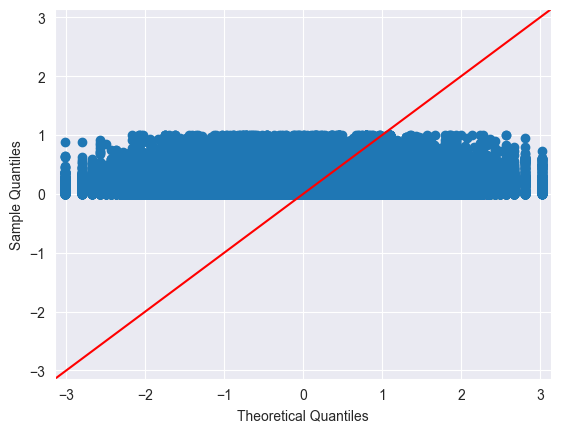

In [44]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Supposons que X est votre ensemble de données k-dimensionnel
# Pour l'exemple, nous utilisons une seule dimension de X
# x = X[:,0]  # Remplacez 0 par l'indice de la dimension que vous voulez tester

# Génération du Q-Q plot

NormalityDistributionCheck.qq_plot(x_train)


Les trois tests de normalité effectuée jusque lá, montre que les données ne semble pas suivre une distribution gaussienne.


### Elimination de donneés aberrantes

### RE-entrainment avec methode gaussienne sur un ensemble avec moins des données aberrantes

In [53]:
# Créer un modèle Naive Bayes gaussien
#gnb = GaussianNB(var_smoothing=0.25)
gnb = GaussianNB()

# Entraîner le modèle sur les données d'entraînement
gnb.fit(x_train, y_train)

# Faire des prédictions sur les données de test
y_pred = gnb.predict(x_test)

# Calculer l'accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculer la precision
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)

# Calculer le recall
recall = recall_score(y_test, y_pred, average='macro',zero_division=1)

# Calculer le F1-score
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.47474747474747475
Precision: 0.6772114922114922
Recall: 0.5703703703703704
F1-score: 0.45822021116138756


In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Définir la grille de valeurs pour var_smoothing à rechercher
params = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}

# Initialiser le classifieur GaussianNB
gnb = GaussianNB()

# Initialiser GridSearchCV avec le classifieur et la grille de paramètres
grid_search = GridSearchCV(gnb, params, cv=5, scoring='accuracy')

# Effectuer la recherche des meilleurs paramètres en utilisant les données d'entraînement
grid_search.fit(x_train, y_train)

# Afficher les meilleurs paramètres et le meilleur score trouvé
print("Meilleur var_smoothing trouvé:", grid_search.best_params_['var_smoothing'])
print("Meilleur score d'accuracy trouvé:", grid_search.best_score_)

C:\Users\lordyhas\PycharmProjects\ift712-final-project\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Meilleur var_smoothing trouvé: 1e-05
Meilleur score d'accuracy trouvé: 0.7362152694849137


# Entrainement sur des méthodes sans hypothèses


## Experimentation sur Random Forest

### Entrainment du Random Forest normale 
avec ses parametres par défaut,

In [50]:
from sklearn.model_selection import cross_val_score

rfc_model1 = RandomForestClassifier(n_estimators=100, oob_score=True,) #warm_start=True,
rfc_model1.fit(x_train, y_train)

oob_error = rfc_model1.oob_score

#-cross_val_score(rfc_model1, x_train, y_train, cv=5, scoring='neg_log_loss').mean() 


train_score = rfc_model1.score(x_train, y_train)
#test_score = best_rfc_model.score(x_test,)
print("=== Random Forest Scores ==== ")
print("Train Score: \nAccuracy :", train_score)
print("Train Loss :", oob_error)


y_pred = rfc_model1.predict(x_test)

#loss = -CrossValidate.cv_score(rfc_model1, x_test, y_test, scoring='neg_log_loss').mean() 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("\nTest Score :",)
print(f"Accuracy : {accuracy}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"F1-score : {f1}")


=== Random Forest Scores ==== 
Train Score: 
Accuracy : 1.0
Train Loss : True

Test Score :
Accuracy : 0.9646464646464646
Precision : 0.9540229885057471
Recall : 0.9521072796934867
F1-score : 0.9473951336020302


C:\Users\lordyhas\PycharmProjects\ift712-final-project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Mesure de la performance sur les nombres d'arbres différents

In [26]:
from src.features.utils import find_best_split

find_best_split(x_train.shape[0], 5)

(6, [1, 2, 3, 4, 6])

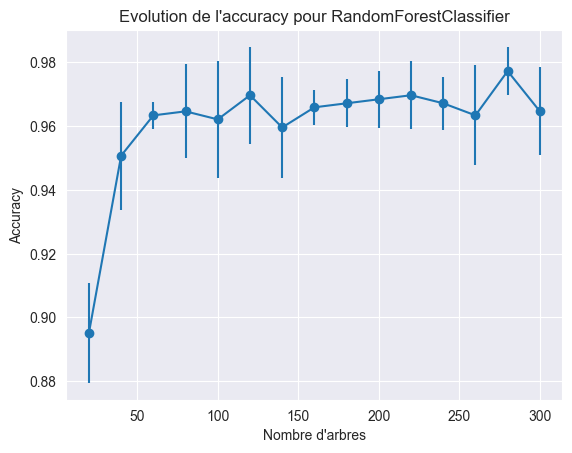

In [28]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

# Effectuer la validation croisée stratifiée avec différentes valeurs pour le nombre d'arbres
min_trees = 20
max_trees = 300
num_trees = list(range(min_trees, max_trees+1, 20))
mean_accuracy = []
std_accuracy = []

# Créer un objet StratifiedKFold
n_splits, _ = find_best_split(x_train.shape[0], 5)
#skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Boucle sur chaque nombre d'arbres à tester
for n_trees in num_trees:
    rf_clf = RandomForestClassifier(n_estimators=n_trees)
    
    # Utiliser la validation croisée stratifiée
    scores = CrossValidate.cv_score(rf_clf, x_train, y_train, scoring='accuracy')
    
    # Calculer la moyenne et l'écart type des scores d'accuracy
    mean_accuracy.append(np.mean(scores))
    std_accuracy.append(np.std(scores))

# Afficher la courbe de l'accuracy en fonction du nombre d'arbres
plt.errorbar(num_trees, mean_accuracy, yerr=std_accuracy, fmt='-o')
plt.title('Evolution de l\'accuracy pour RandomForestClassifier')
plt.xlabel('Nombre d\'arbres')
plt.ylabel('Accuracy')
plt.show()


Plus nous augmentons les nombres d'arbre plus la precision augmente

### Mesure de l'erreur sur les nombres d'arbres différents

Experimentation sur trois arbres différents

C:\Users\lordyhas\PycharmProjects\ift712-final-project\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\lordyhas\PycharmProjects\ift712-final-project\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\lordyhas\PycharmProjects\ift712-final-project\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


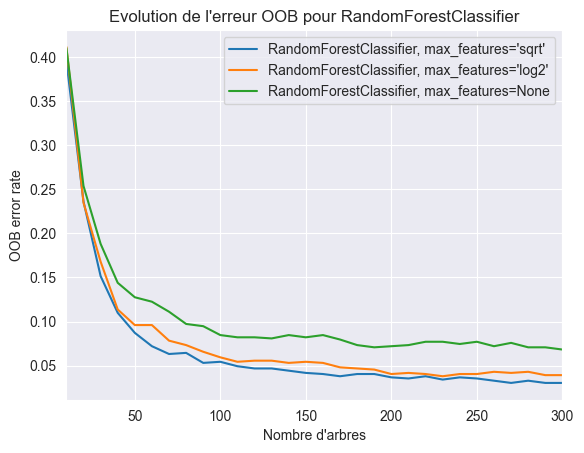

In [14]:
from collections import OrderedDict

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 42

# REMARQUE : définir le paramètre de construction `warm_start` sur `True` désactive la prise en charge des ensembles parallélisés mais est nécessaire pour suivre la trajectoire des erreurs OOB pendant la formation.

# Chaque arbre à un nombre de caractéristiques différent [max_features] à considérer lors de la recherche de la meilleure division pour chaque nœud de l’arbre.
ensemble_rf_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
]

# Mappez un nom de classificateur à une liste de paires (<n_estimators>, <error rate>).
error_rate = OrderedDict((label, []) for label, _ in ensemble_rf_clfs)

# Plage de valeurs `n_estimators` à explorer.
min_estimators = 10
max_estimators = 300


for label, clf in ensemble_rf_clfs:
    for i in range(min_estimators, max_estimators + 1, 10):
        clf.set_params(n_estimators=i)
        clf.fit(x_train, y_train)

        # Enregistrez l'erreur OOB pour chaque paramètre `n_estimators=i`.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Générez le tracé « Taux d'erreur OOB » par rapport aux « n_estimators ».
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
    
plt.title('Evolution de l\'erreur OOB pour RandomForestClassifier')
plt.xlim(min_estimators, max_estimators)
plt.xlabel("Nombre d\'arbres")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc, f1_score

# Entraîner le modèle RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

# Faire des prédictions sur les données de test
y_pred_proba = clf.predict_proba(y_train)

# Calculer le ROC curve et l'Area Under the Curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

# Afficher le ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# F1 score
y_pred = clf.predict(x_test)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


### Random Forest : La recherche de meilleurs d'hyperparamètres

In [31]:

# Définir les hyperparamètres à rechercher
rfc_param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion':["gini", "entropy", "log_loss"]
}

# Créer une instance du modèle Random Forest
rfc_model = RandomForestClassifier()

# Effectuer une recherche des hyperparamètres avec validation croisée
rfc_cross_val = CrossValidate(model=rfc_model, params=rfc_param_grid, k_fold=4, metric='accuracy')
rfc_cross_val.train(x_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Ramdom Forest Meilleurs hyperparamètres :", rfc_cross_val.best_params)

# Entraîner le modèle avec les meilleurs hyperparamètres trouvés
best_ = rfc_cross_val.best_params
best_rfc_model = rfc_cross_val.best_model
best_rfc_model.fit(x_train, y_train)

Ramdom Forest Meilleurs hyperparamètres : {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestClassifier()

In [32]:
train_score = best_rfc_model.score(x_train, y_train)
#test_score = best_rfc_model.score(x_test,)
print("=== Random Forest Scores ==== ")
print("Train Score: \nAccuracy :", train_score)


y_pred = best_rfc_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("\nTest Score :",)
print(f"Accuracy : {accuracy}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"F1-score : {f1}")

=== Random Forest Scores ====  1.0
Train Score: 
Accuracy : 1.0

Test Score :
Accuracy : 0.9797979797979798
Precision : 0.9803921568627451
Recall : 0.9852941176470589
F1-score : 0.9784262796027501


In [ ]:
### Random Forest avec reduction de dimension PCA 

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Meilleurs hyperparamètres : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100, 'criterion':"gini"} utilisé


    
# Création d'un pipeline avec standardisation, PCA et classification
pipeline = Pipeline([
    #('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    # avec les meilleurs hyperparametres trouvées
    ('classifier', RandomForestClassifier(n_estimators=100, min_samples_split=2, criterion="gini"))
])
    
# Entraînement du modèle
pipeline.fit(x_train, y_train)

    

train_loss = -cross_val_score(pipeline, x_train, y_train, cv=5, scoring='neg_log_loss').mean() 

# Prédictions sur les données de test
train_score = best_rfc_model.score(x_train, y_train)
#test_score = best_rfc_model.score(x_test,)
print("=== Random Forest Scores ==== ", train_score)
print("Train Score: \nAccuracy :", train_score)
print("Train Loss :", train_loss)



# Prédictions sur les données de test
y_pred = pipeline.predict(x_test)

# Calculer et imprimer les différentes métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

loss = -cross_val_score(pipeline, x_test, y_test, cv=5, scoring='neg_log_loss').mean() 
print("\nTest Score :",) 
print("Test Loss :", train_loss)
print(f"Accuracy : {accuracy}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"F1-score : {f1}")

# Appeler la fonction pca_train pour entraîner et évaluer le modèle


C:\Users\lordyhas\PycharmProjects\ift712-final-project\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\lordyhas\PycharmProjects\ift712-final-project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\lordyhas\PycharmProjects\ift712-final-project\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:1011: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lordyhas\PycharmProjects\ift712-final-project\.venv\Lib\site-packages\sklearn\metrics\_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "C:\Users\lordyhas\PycharmProjects\ift712-final-project\.ve

NameError: name 'best_rfc_model' is not defined

## Entrainement MLP

In [ ]:
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(solver='adam', alpha=1e-5, learning_rate='adaptive', max_iter= 1000, hidden_layer_sizes=(5,), random_state=1, verbose= False)
clf.fit(x_train, y_train)
clf.best_loss_
#clf.predict(x_test)
#clf.predict(x_test)

MLP sans cross validé il faut plus de 5000 iterations pour converger, 

### La recherche d'hyperparametre

In [47]:
from src.models.train_model import CrossValidate
from sklearn.neural_network import MLPClassifier

# Définir les hyperparamètres à rechercher
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 100)],
    'activation': ['relu', 'tanh','softmax', 'elu', 'selu'],
    # Différentes valeurs pour alpha pour tester la régularisation L2
    'alpha': [0.0001, 0.001, 0.01] ,
    'tol': [0.0001, 0.001, 0.01],
    'early_stopping': [True],
    'n_iter_no_change': [5, 10, 20]
}


# Créer une instance du modèle MLP
mpl_model = MLPClassifier(max_iter=500, verbose=True)

# Effectuer une recherche des hyperparamètres avec validation croisée
grid_search = CrossValidate(model=mpl_model, params=param_grid, k_fold=5, metric='accuracy')
grid_search.train(x_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("MLP Meilleurs hyperparamètres :", grid_search.best_params)

# Entraîner le modèle avec les meilleurs hyperparamètres trouvés
best_mlp_model = grid_search.best_model
best_mlp_model.fit(x_train, y_train)


Iteration 1, loss = 4.60516250
Validation score: 0.037500
Iteration 2, loss = 4.54505511
Validation score: 0.050000
Iteration 3, loss = 4.49477153
Validation score: 0.050000
Iteration 4, loss = 4.44558177
Validation score: 0.062500
Iteration 5, loss = 4.39272756
Validation score: 0.075000
Iteration 6, loss = 4.33480186
Validation score: 0.112500
Iteration 7, loss = 4.27004143
Validation score: 0.137500
Iteration 8, loss = 4.20110842
Validation score: 0.125000
Iteration 9, loss = 4.12681138
Validation score: 0.137500
Iteration 10, loss = 4.04545795
Validation score: 0.162500
Iteration 11, loss = 3.95900892
Validation score: 0.200000
Iteration 12, loss = 3.86712804
Validation score: 0.200000
Iteration 13, loss = 3.76853644
Validation score: 0.212500
Iteration 14, loss = 3.66789853
Validation score: 0.250000
Iteration 15, loss = 3.56122795
Validation score: 0.287500
Iteration 16, loss = 3.45216957
Validation score: 0.325000
Iteration 17, loss = 3.33803559
Validation score: 0.362500
Iterat

C:\Users\lordyhas\PycharmProjects\ift712-final-project\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1215 fits failed out of a total of 2025.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lordyhas\PycharmProjects\ift712-final-project\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lordyhas\PycharmProjects\ift712-final-project\.venv\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\lordyhas\PycharmProjects\ift712-final-project\.venv\Lib\

Iteration 1, loss = 4.61200820
Validation score: 0.010101
Iteration 2, loss = 4.54655429
Validation score: 0.030303
Iteration 3, loss = 4.48986085
Validation score: 0.040404
Iteration 4, loss = 4.42932471
Validation score: 0.090909
Iteration 5, loss = 4.36326082
Validation score: 0.090909
Iteration 6, loss = 4.29055137
Validation score: 0.111111
Iteration 7, loss = 4.21203525
Validation score: 0.141414
Iteration 8, loss = 4.12327909
Validation score: 0.191919
Iteration 9, loss = 4.02802892
Validation score: 0.222222
Iteration 10, loss = 3.92548847
Validation score: 0.282828
Iteration 11, loss = 3.81559508
Validation score: 0.313131
Iteration 12, loss = 3.69952863
Validation score: 0.373737
Iteration 13, loss = 3.57512363
Validation score: 0.373737
Iteration 14, loss = 3.44420432
Validation score: 0.414141
Iteration 15, loss = 3.30859579
Validation score: 0.454545
Iteration 16, loss = 3.16946723
Validation score: 0.515152
Iteration 17, loss = 3.03092339
Validation score: 0.545455
Iterat

MLPClassifier(early_stopping=True, max_iter=500, n_iter_no_change=20, tol=0.001,
              verbose=True)

In [48]:
print("MLP Meilleurs hyperparamètres :", grid_search.best_params)

MLP Meilleurs hyperparamètres : {'activation': 'relu', 'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': (100,), 'n_iter_no_change': 20, 'tol': 0.001}


In [46]:
print("MLP Meilleurs hyperparamètres :", grid_search.best_params)

MLP Meilleurs hyperparamètres : {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,)}


In [49]:
train_score = best_mlp_model.score(x_train, y_train)
#test_score = best_rfc_model.score(x_test,)
print("MLP Train Accuracy :", train_score)

MLP Train Accuracy : 0.9878787878787879


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

# Prédictions sur les données de test
y_pred = best_mlp_model.predict(x_test)
y_pred_proba = best_mlp_model.predict_proba(x_test)  # Probabilités prédites pour log_loss

# Calculer et imprimer les différentes métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Calculer la perte (loss)
loss = log_loss(y_test, y_pred_proba)

print(f"Accuracy : {accuracy}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"F1-score : {f1}")
print(f"Log Loss : {loss}")

Loss curve

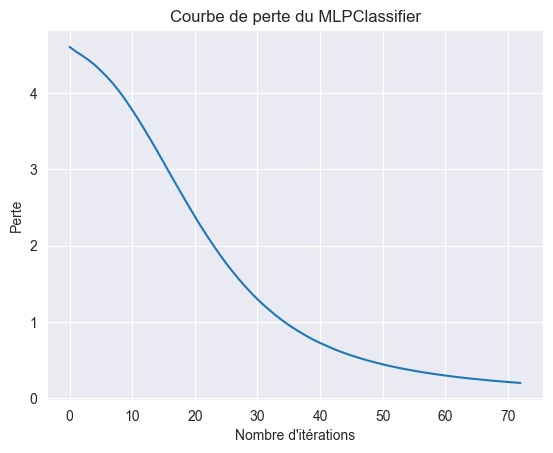

In [52]:
plt.plot(best_mlp_model.loss_curve_)
plt.title('Courbe de perte du MLPClassifier')
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Perte')
plt.show()

Accuracy curve

Iteration 1, loss = 4.59801173
Validation score: 0.030303
Iteration 2, loss = 4.52403924
Validation score: 0.040404
Iteration 3, loss = 4.45890087
Validation score: 0.070707
Iteration 4, loss = 4.38605485
Validation score: 0.070707
Iteration 5, loss = 4.30995631
Validation score: 0.060606
Iteration 6, loss = 4.22711854
Validation score: 0.080808
Iteration 7, loss = 4.13508900
Validation score: 0.121212
Iteration 8, loss = 4.03659586
Validation score: 0.141414
Iteration 9, loss = 3.92744151
Validation score: 0.141414
Iteration 10, loss = 3.81293093
Validation score: 0.141414
Iteration 11, loss = 3.69214488
Validation score: 0.161616
Iteration 12, loss = 3.56616972
Validation score: 0.232323
Iteration 13, loss = 3.43310574
Validation score: 0.292929
Iteration 14, loss = 3.29695603
Validation score: 0.363636
Iteration 15, loss = 3.15763186
Validation score: 0.393939
Iteration 16, loss = 3.01655021
Validation score: 0.474747
Iteration 17, loss = 2.87525397
Validation score: 0.505051
Iterat

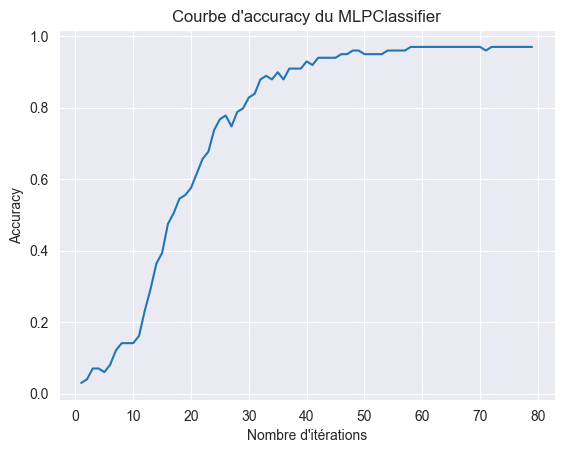

In [54]:

# Récupérer l'accuracy à chaque itération
train_accuracy = best_mlp_model.validation_scores_

# Afficher la courbe d'accuracy
plt.plot(np.arange(1, len(train_accuracy) + 1), train_accuracy)
plt.title('Courbe d\'accuracy du MLPClassifier')
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Accuracy')
plt.show()

##

### Résultats

Résultats :

| Model | Best Parameter | Accuracy Train Score | Accuracy Train Score |
--------|----------------|----------------------|----------------------|
| Random Forest |  | 100% | |
| MLP |  | 100% | |


- Random Forest  Meilleurs hyperparamètres : {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
- MLP Meilleurs hyperparamètres : {'activation': 'relu', 'alpha': 0.0001, 'early_stopping': True, 'hidden_layer_sizes': (100,), 'n_iter_no_change': 20, 'tol': 0.001}
- 